In [1]:
!pip install -q slycot control
from control import matlab
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print("28E24013の大木啓輔です")

28E24013の大木啓輔です


制御対象を準備
<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       1
---------------
s^2 + 0.6 s + 1

極を確認
以下に制御対象のボード線図を示す


(0.1, 100.0)

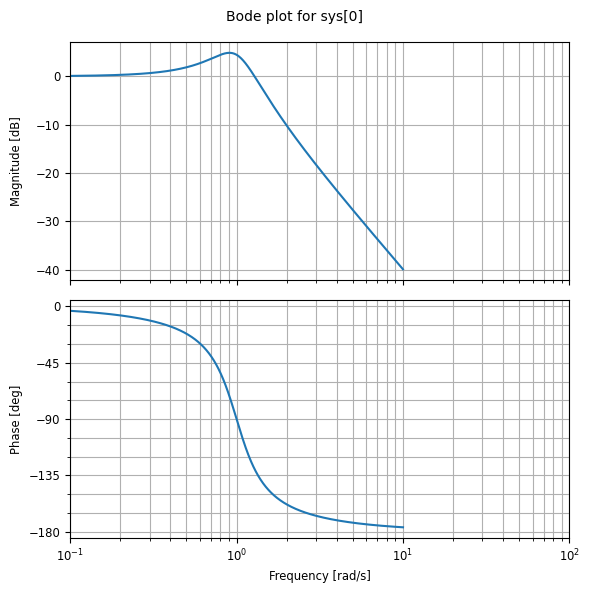

In [3]:
print("制御対象を準備")
num = [1] #分子の係数
dem = [1, 0.6, 1] #分母の係数
P = matlab.tf(num,dem) #分数にしてPを作る
print(P) #Pを出力

print("極を確認")
matlab.pole(P) #極を確認

print("以下に制御対象のボード線図を示す")
fig = plt.figure(figsize = (6, 6)) #12×6のfigureを作成
mag, phase, omega = matlab.bode(P, Hz=False) #figureにボード線図を描画
plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定

PI補償器を準備
PI補償器の係数： K_p = -0.525876460767948, K_i = 0.239808153477216
PI補償器の伝達関数:
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-0.5259 s + 0.2398
------------------
        s

フィードバック系:
<TransferFunction>: sys[7]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        s^3 + 0.6 s^2 + s
---------------------------------
s^3 + 0.6 s^2 + 0.4741 s + 0.2398

極を確認:
[-0.02909115+0.66464505j -0.02909115-0.66464505j -0.5418177 +0.j        ]
PI補償器のボード線図:
PI補償器の係数： K_p = -0.0584307178631071, K_i = 0.539568345323743
PI補償器の伝達関数:
<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


-0.05843 s + 0.5396
-------------------
         s

フィードバック系:
<TransferFunction>: sys[14]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        s^3 + 0.6 s^2 + s
---------------------------------
s^3 + 0.6 s^2 + 0.9416 s + 0.5396

極を確認:
[-0.00992583+0.96434115j -0.00992583-0.96434115j -0.58014834+0.j        ]
PI補償器のボード線図:
PI補償器の係数： K_p = 0.943238731218695, K_i = 1.13908872901678
P

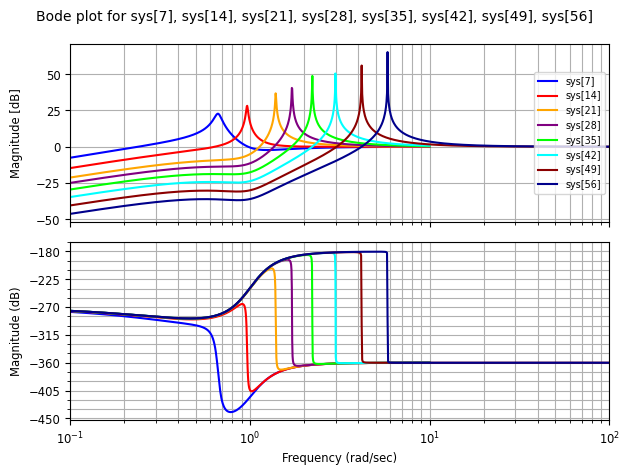

In [4]:
print("PI補償器を準備")

# PI補償器のパラメータ
K_p_values = [-0.525876460767948, -0.0584307178631071, 0.943238731218695, 1.94490818030049, 3.9482470784641, 7.95492487479131, 16.5, 33]
K_i_values = [0.239808153477216, 0.539568345323743, 1.13908872901678, 1.73860911270983, 2.93764988009592, 5.3357314148681, 10.4, 20.3]

colors = ['blue', 'red', 'orange', 'purple', 'lime', 'cyan', 'darkred', 'darkblue']

for K_p, K_i, color in zip(K_p_values, K_i_values, colors):
    print(f"PI補償器の係数： K_p = {K_p}, K_i = {K_i}")

    I_num = [K_i] # Iの補償器の分子
    I_dem = [1, 0] # Iの補償器の分母
    I_conpensater = matlab.tf(I_num, I_dem) # I補償器

    PI_conpensater = K_p + I_conpensater

    print("PI補償器の伝達関数:")
    print(PI_conpensater) # PIの補償器の伝達関数を出力

    sys_1 = matlab.feedback(1, P * PI_conpensater, -1) # フィードバック系を構成
    print("フィードバック系:")
    print(sys_1) # フィードバック系を出力

    print("極を確認:")
    print(matlab.pole(sys_1)) # 極を確認

    print("PI補償器のボード線図:")
    mag, phase, omega = matlab.bode(sys_1, Hz=False, linestyle='-', color=color) # ボード線図を取得
    plt.xlim(1e-01, 1e+02) # x軸の範囲を1e-01から1e+02に設定


    # 横軸と縦軸のラベルを追加
    plt.xlabel('Frequency (rad/sec)')
    plt.ylabel('Magnitude (dB)')